## Basic imports:

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
pd.set_option('float_format', '{:f}'.format)

In [2]:
cols_to_use = ['SALES_MANAGER',
 'CLIENT_MANAGER',
 'MASTER_ACCOUNT#',
 'CLIENT_SEGMENT',
 'OPTY_ID',
 'OPTY_NAME',
 'OPTY_CREATED_MNT',
 'OPTY_CREATED_DT',
 'CLOSE_DT',
 'OPTY_TYPE',
 'SALES_STAGE',
 'PROBABILITY',
 'CONTRACT_TERM',
 'CURCY_CD',
 'REASON_WON_LOST',
 'OPTY_REVENUE',
 'OPTY_WO_ZAR_VALUE',
 'REV_MRC',
 'REV_NRC',
 'REV_PRICE',
 'REV_PRODUCT',
 'REV_PRODUCT_LN']
#df = pd.read_excel(open('../ISDataAnalysis/NolanReport.xlsx','rb'), sheetname='Data',usecols=cols_to_use)
df = pd.read_excel(open('../ISDataAnalysis/NolanCMReport.xlsx','rb'), sheet_name='OptyData')

In [3]:
start_mnt = '2018-10-01'
end_mnt = '2018-12-30'

## Period Dates are: {{start_mnt}} to {{end_mnt}}
change dates below to define period for below graphs:

## Opty Created count per Sales Manager for given period:

In [4]:
#Convert columns to number:
df["CONTRACT_TERM"] = df["CONTRACT_TERM"].astype(int)
df["OPTY_REVENUE"] = df["OPTY_REVENUE"].astype(float)
df["OPTY_WO_ZAR_VALUE"] = df["OPTY_WO_ZAR_VALUE"].astype(float)
df["REV_MRC"] = df["REV_MRC"].astype(float)
df["REV_NRC"] = df["REV_NRC"].astype(float)
df["REV_PRICE"] = df["REV_PRICE"].astype(float)

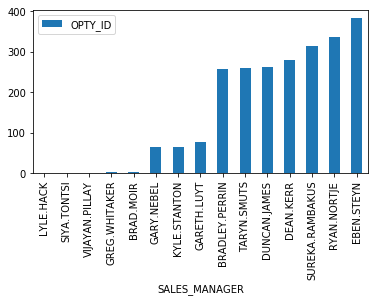

In [5]:
df_SM_agg_filtered = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)]
df_SM_agg_filtered = df_SM_agg_filtered.groupby(['SALES_MANAGER']).OPTY_ID.nunique().reset_index()
df_SM_agg_filtered = df_SM_agg_filtered[['SALES_MANAGER', 'OPTY_ID']]
df_SM_agg_filtered = df_SM_agg_filtered.sort_values('OPTY_ID')
df_SM_agg_filtered[['SALES_MANAGER', 'OPTY_ID']].plot(x='SALES_MANAGER',kind='bar', figsize=(6,3), fontsize=10)

## Opty Created count per CM for given period:

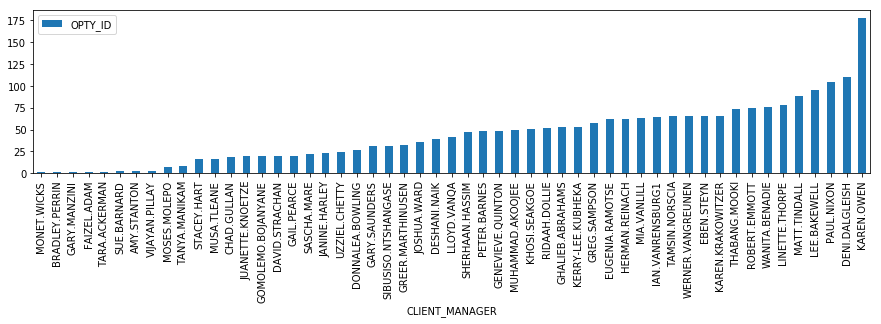

In [6]:
df_CM_agg_filtered = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)]
df_CM_agg_filtered = df_CM_agg_filtered.groupby(['CLIENT_MANAGER']).OPTY_ID.nunique().reset_index()
df_CM_agg_filtered = df_CM_agg_filtered[['CLIENT_MANAGER', 'OPTY_ID']]
df_CM_agg_filtered = df_CM_agg_filtered.sort_values('OPTY_ID')
df_CM_agg_filtered[['CLIENT_MANAGER', 'OPTY_ID']].plot(x='CLIENT_MANAGER',kind='bar', figsize=(15,3), fontsize=10)

## Sales Manager Report with WON Opty count and Opty Revenue SUM for given period:

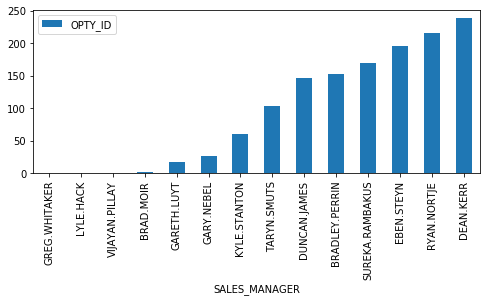

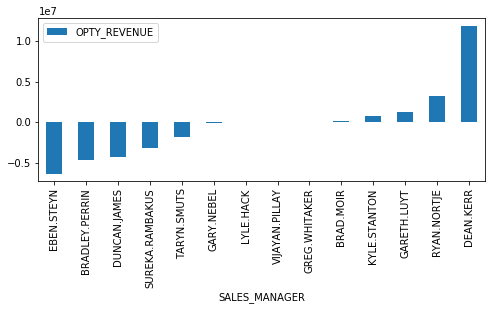

In [7]:
df_SM_won_deal = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)\
                        &(df['PROBABILITY']>=90)]
df_SM_won_deal = df_SM_won_deal[['SALES_MANAGER', 'CLIENT_MANAGER','OPTY_ID', 'OPTY_REVENUE']]
df_SM_won_deal.drop_duplicates(keep='first', inplace=True)
df_SM_won_deal = df_SM_won_deal.groupby(['SALES_MANAGER'])\
                    .agg({'OPTY_ID':'count', 'OPTY_REVENUE': 'sum'})\
                    .reset_index()\
                    .rename(columns={'COUNT':'OPTY_REV'})
df_SM_won_deal = df_SM_won_deal.sort_values('OPTY_ID')
df_SM_won_deal[['SALES_MANAGER', 'OPTY_ID']].plot(x='SALES_MANAGER',kind='bar', figsize=(8,3), fontsize=10)
df_SM_won_deal = df_SM_won_deal.sort_values('OPTY_REVENUE')
df_SM_won_deal[['SALES_MANAGER', 'OPTY_REVENUE']].plot(x='SALES_MANAGER',kind='bar', figsize=(8,3), fontsize=10)

## Client Manager Report with WON Opty count and Opty Revenue SUM for given period:

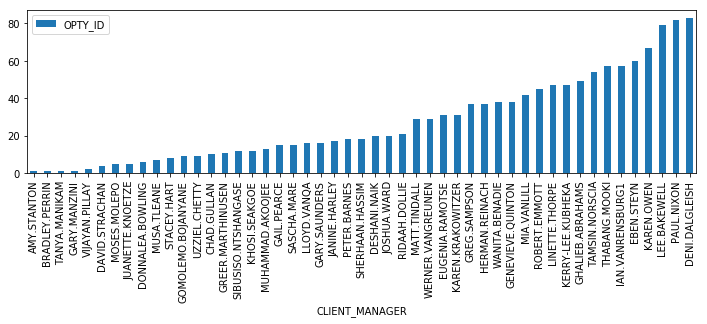

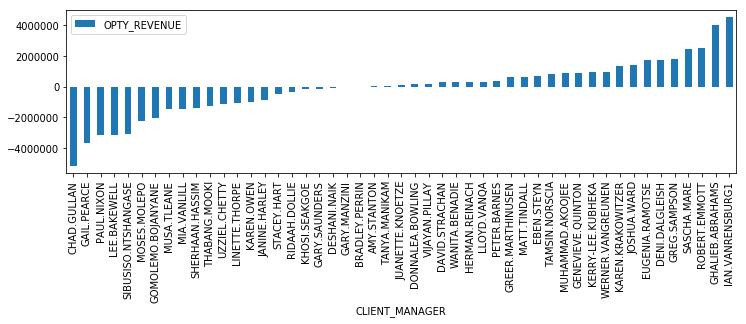

In [8]:
df_CM_won_deal = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)\
                        &(df['PROBABILITY']>=90)]
df_CM_won_deal = df_CM_won_deal[['SALES_MANAGER', 'CLIENT_MANAGER','OPTY_ID', 'OPTY_REVENUE']]
df_CM_won_deal.drop_duplicates(keep='first', inplace=True)
df_CM_won_deal = df_CM_won_deal.groupby(['CLIENT_MANAGER'])\
                    .agg({'OPTY_ID':'count', 'OPTY_REVENUE': 'sum'})\
                    .reset_index()\
                    .rename(columns={'COUNT':'OPTY_REV'})
df_CM_won_deal = df_CM_won_deal.sort_values('OPTY_ID')
df_CM_won_deal[['CLIENT_MANAGER', 'OPTY_ID']].plot(x='CLIENT_MANAGER',kind='bar', figsize=(12,3), fontsize=10)
df_CM_won_deal = df_CM_won_deal.sort_values('OPTY_REVENUE')
df_CM_won_deal[['CLIENT_MANAGER', 'OPTY_REVENUE']].plot(x='CLIENT_MANAGER',kind='bar', figsize=(12,3), fontsize=10)

## Sales Manager Report with LOST Opty count and Opty Revenue SUM for given period:

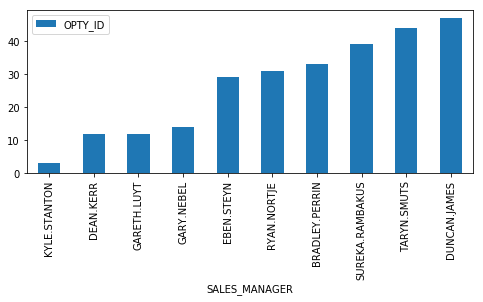

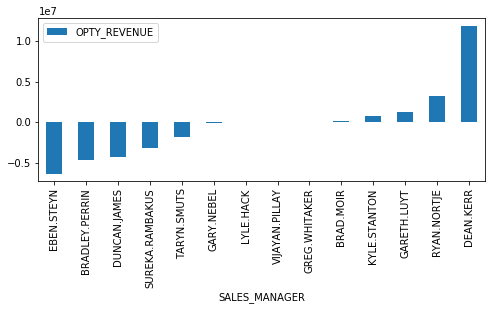

In [9]:
df_SM_lost_deal = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)\
                        &(df['PROBABILITY']==0)]
df_SM_lost_deal = df_SM_lost_deal[['SALES_MANAGER', 'CLIENT_MANAGER','OPTY_ID', 'OPTY_REVENUE']]
df_SM_lost_deal.drop_duplicates(keep='first', inplace=True)
df_SM_lost_deal = df_SM_lost_deal.groupby(['SALES_MANAGER'])\
                    .agg({'OPTY_ID':'count', 'OPTY_REVENUE': 'sum'})\
                    .reset_index()\
                    .rename(columns={'COUNT':'OPTY_REV'})
df_SM_lost_deal = df_SM_lost_deal.sort_values('OPTY_ID')
df_SM_lost_deal[['SALES_MANAGER', 'OPTY_ID']].plot(x='SALES_MANAGER',kind='bar', figsize=(8,3), fontsize=10)
df_SM_lost_deal = df_SM_won_deal.sort_values('OPTY_REVENUE')
df_SM_lost_deal[['SALES_MANAGER', 'OPTY_REVENUE']].plot(x='SALES_MANAGER',kind='bar', figsize=(8,3), fontsize=10)

## Client Manager Report with LOST Opty count and Opty Revenue SUM for given period:

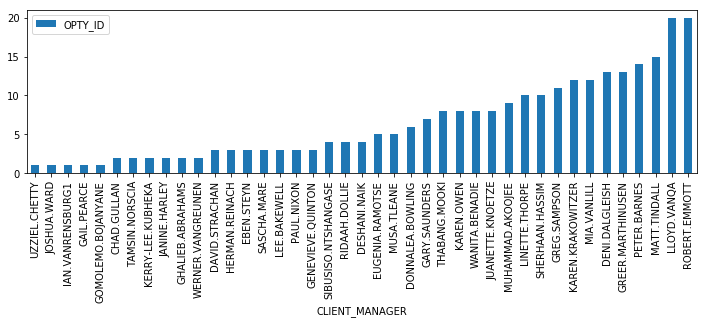

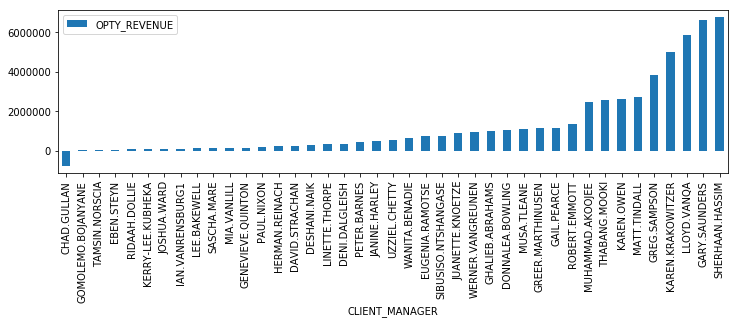

In [10]:
df_CM_lost_deal = df[(df['OPTY_CREATED_DT']>=start_mnt) & (df['OPTY_CREATED_DT']<end_mnt)\
                        &(df['PROBABILITY']==0)]
df_CM_lost_deal = df_CM_lost_deal[['SALES_MANAGER', 'CLIENT_MANAGER','OPTY_ID', 'OPTY_REVENUE']]
df_CM_lost_deal.drop_duplicates(keep='first', inplace=True)
df_CM_lost_deal = df_CM_lost_deal.groupby(['CLIENT_MANAGER'])\
                    .agg({'OPTY_ID':'count', 'OPTY_REVENUE': 'sum'})\
                    .reset_index()\
                    .rename(columns={'COUNT':'OPTY_REV'})
df_CM_lost_deal = df_CM_lost_deal.sort_values('OPTY_ID')
df_CM_lost_deal[['CLIENT_MANAGER', 'OPTY_ID']].plot(x='CLIENT_MANAGER',kind='bar', figsize=(12,3), fontsize=10)
df_CM_lost_deal = df_CM_lost_deal.sort_values('OPTY_REVENUE')
df_CM_lost_deal[['CLIENT_MANAGER', 'OPTY_REVENUE']].plot(x='CLIENT_MANAGER',kind='bar', figsize=(12,3), fontsize=10)

In [11]:
with pd.ExcelWriter('output.xlsx') as writer:
    writer.date_format = None # <--- Workaround for date formatting
    writer.datetime_format = None  # <--- this one for datetime
    df_SM_agg_filtered.to_excel(writer,'SM_COUNT_AGG')
    df_CM_agg_filtered.to_excel(writer,'CM_COUNT_AGG')
    df_SM_won_deal.to_excel(writer, 'SM_WON_AGG')
    df_CM_won_deal.to_excel(writer, 'CM_WON_AGG')
    df_SM_lost_deal.to_excel(writer, 'SM_LOST_DEAL')
    df_CM_lost_deal.to_excel(writer, 'CM_LOST_LOST')

In [12]:
df_CM_won_lost = df.groupby(['OPTY_CREATED_MNT','CLIENT_MANAGER'])\
                 .apply(lambda x: pd.Series(dict(
                     WON_CNT = (x[x.PROBABILITY>=90]['OPTY_ID']).count(),
                     LOST_CNT = (x[x.PROBABILITY==0]['OPTY_ID']).count(),
                     WON = (x[x.PROBABILITY>=90]['OPTY_REVENUE']).sum(),
                     LOST = (x[x.PROBABILITY==0]['OPTY_REVENUE']).sum(),
                 )))
df_CM_won_lost.head()

WON_CNT  LOST_CNT             WON  \
OPTY_CREATED_MNT CLIENT_MANAGER                                         
April-2018       CHAD.GULLAN      23.000000 15.000000  7744830.200000   
                 DEAN.KERR         1.000000  0.000000        0.000000   
                 DENI.DALGLEISH   28.000000  4.000000   605409.538860   
                 DESHANI.NAIK     29.000000 16.000000 12449411.600000   
                 DONNALEA.BOWLING  5.000000  9.000000  -135504.000000   

                                             LOST  
OPTY_CREATED_MNT CLIENT_MANAGER                    
April-2018       CHAD.GULLAN      13826468.000000  
                 DEAN.KERR               0.000000  
                 DENI.DALGLEISH     108400.000000  
                 DESHANI.NAIK      5487897.020000  
                 DONNALEA.BOWLING   319048.000000

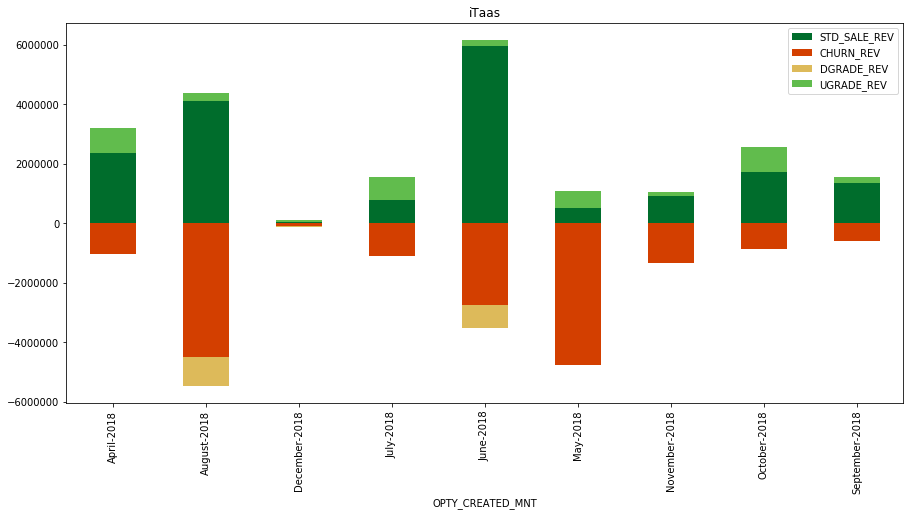

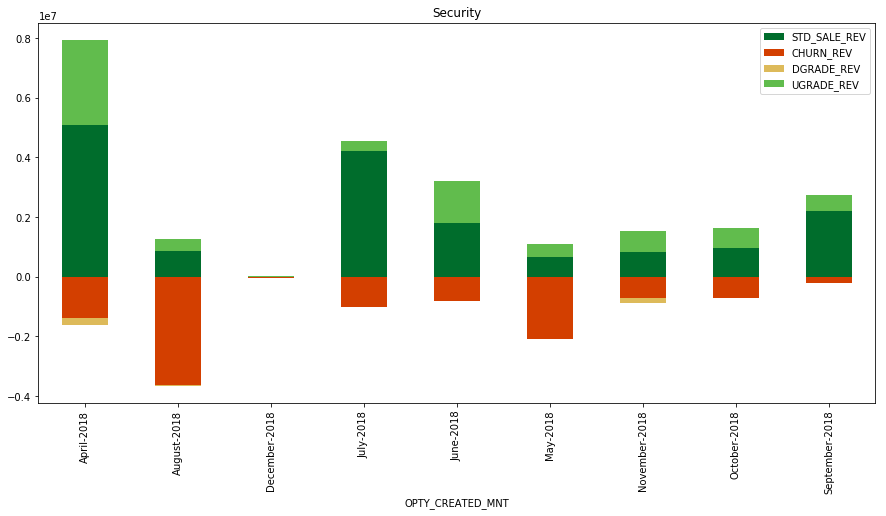

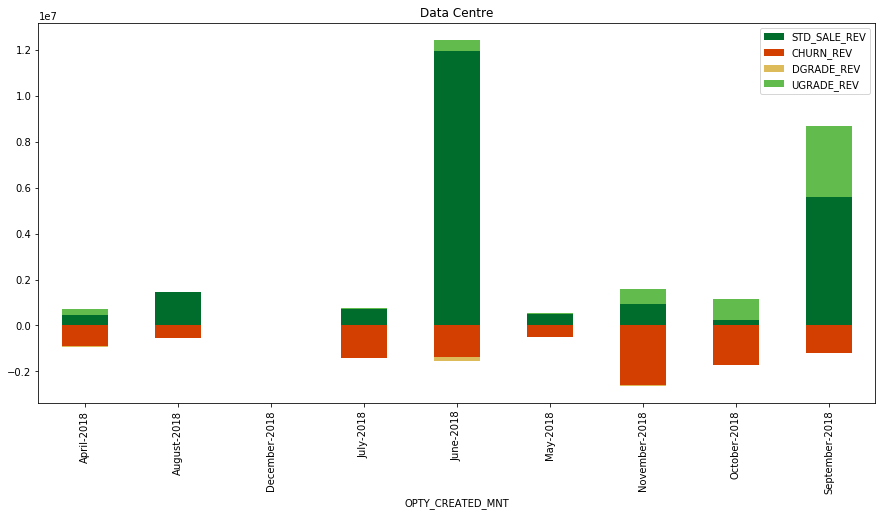

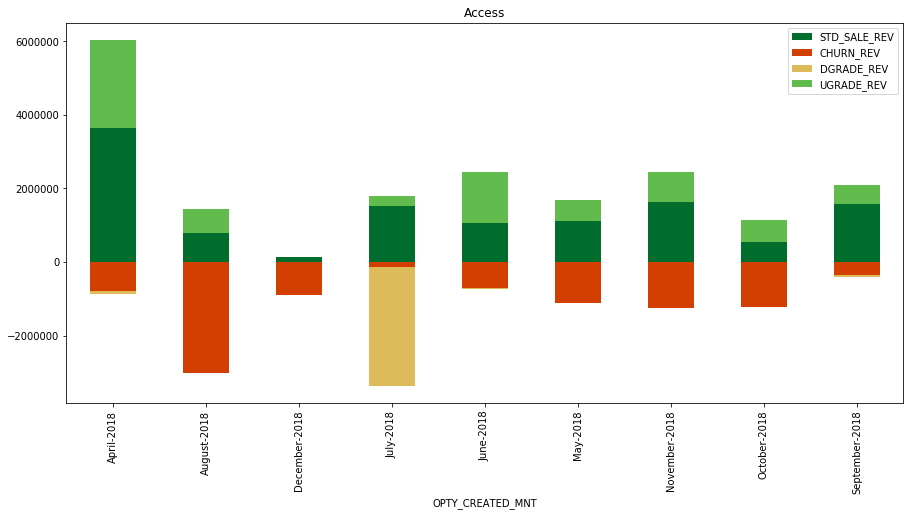

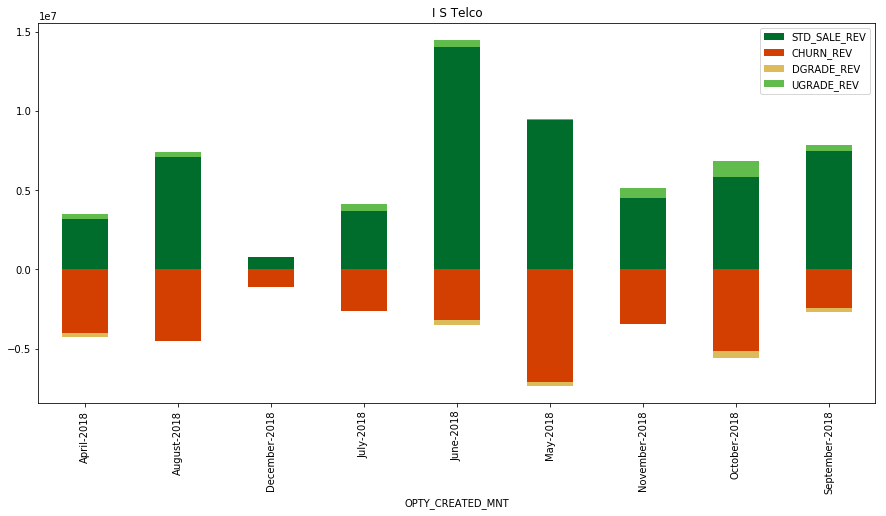

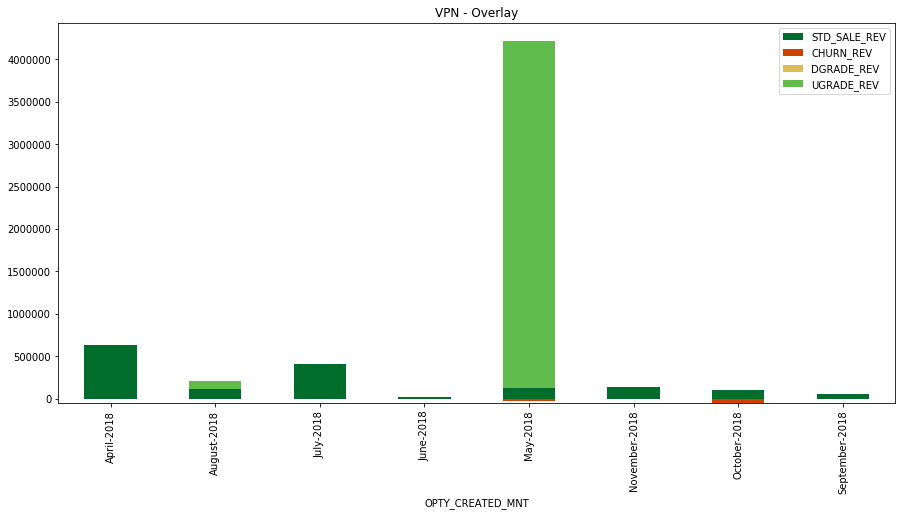

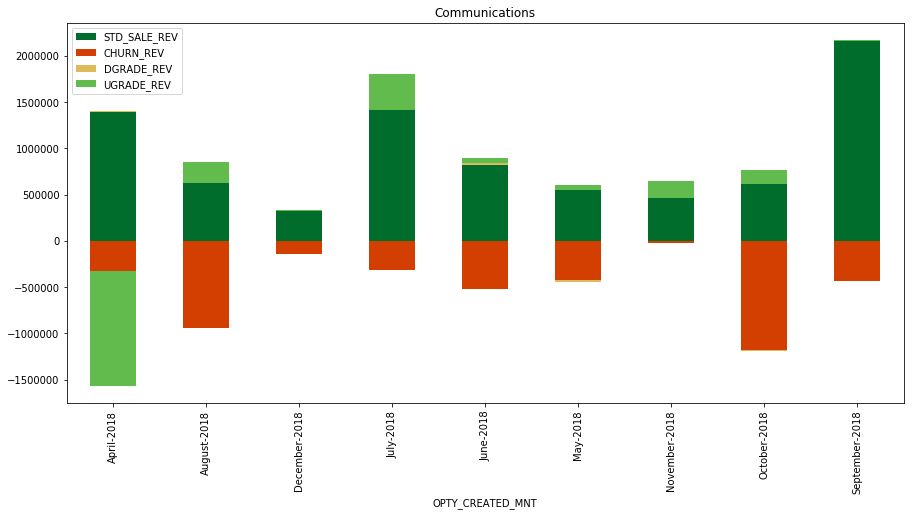

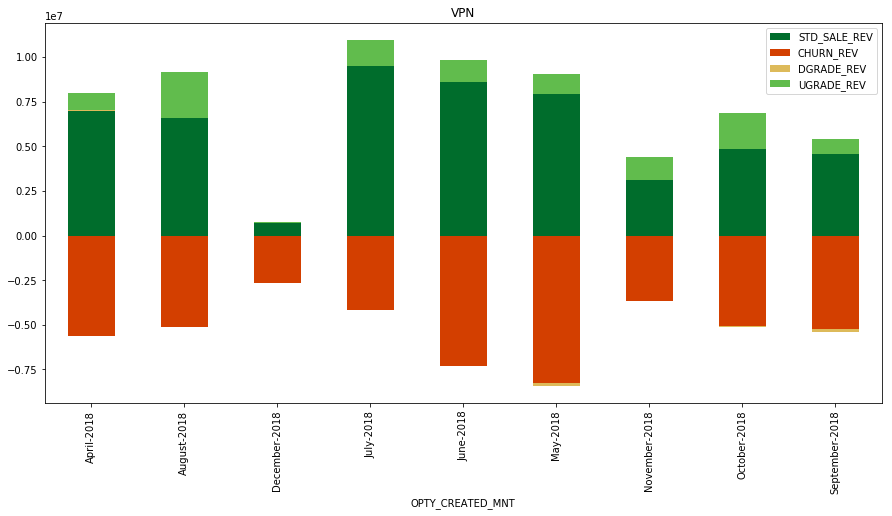

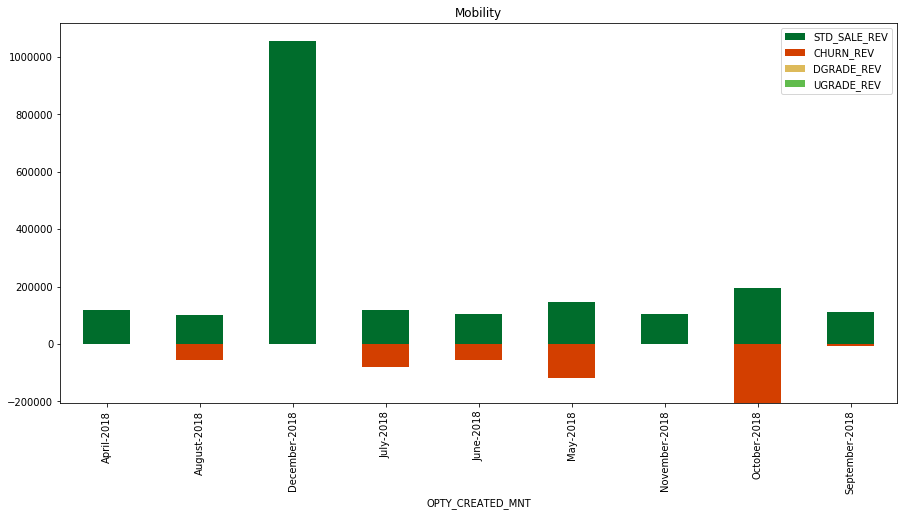

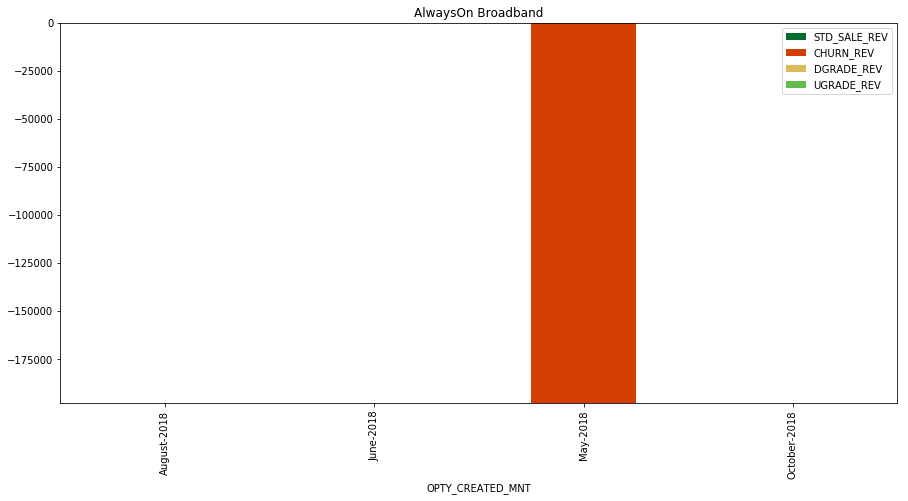

In [13]:
df_rev_ln = df.groupby(['REV_PRODUCT_LN']).sum()
df_rev_ln = df_rev_ln.sort_values('REV_PRICE', ascending=False)
pl = df_rev_ln['REV_PRICE'].reset_index()

for PROD_LN in pl.REV_PRODUCT_LN[:10]:
    df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                     ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

    df_prod_ln_VPN = df_prod_ln[(df_prod_ln['REV_PRODUCT_LN']==PROD_LN) & (df_prod_ln['PROBABILITY']>90)]
    df_prod_ln_VPN = df_prod_ln_VPN.groupby(['OPTY_CREATED_MNT'])\
                     .apply(lambda x: pd.Series(dict(
                         STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                         CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                         DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                         UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                     )))
    df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
    df_prod_ln_VPN.set_index('OPTY_CREATED_MNT',inplace=True)
    fig, ax = plt.subplots(figsize=(30,15))
    colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
    df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
    plt.title(PROD_LN)

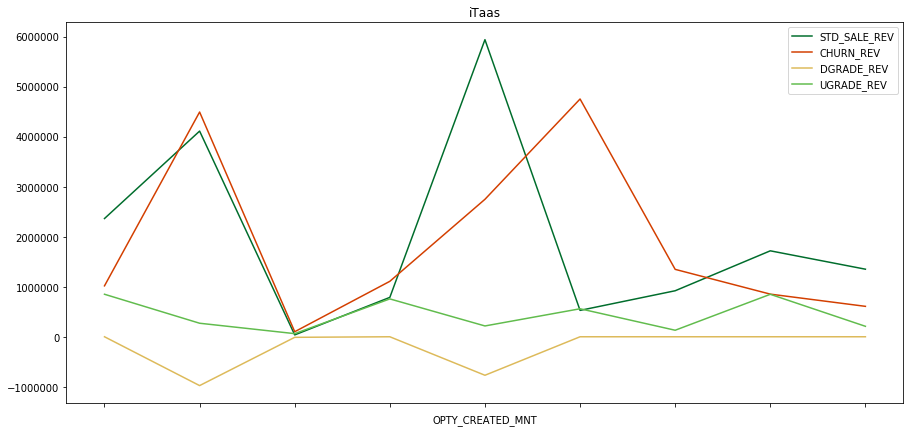

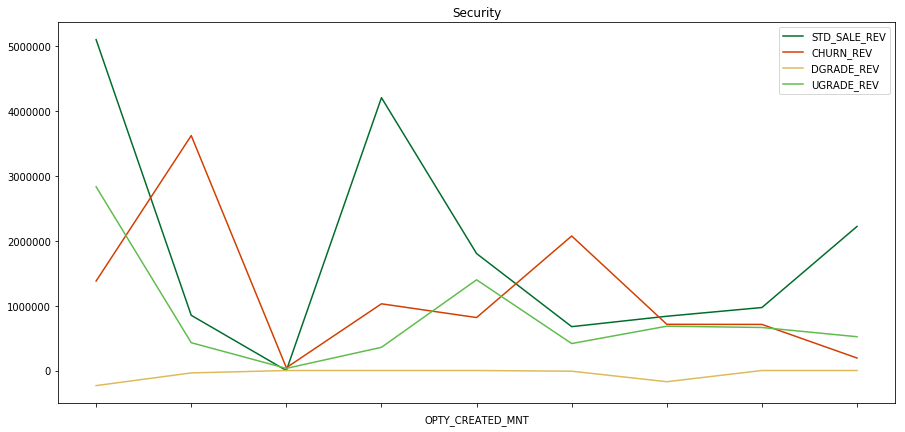

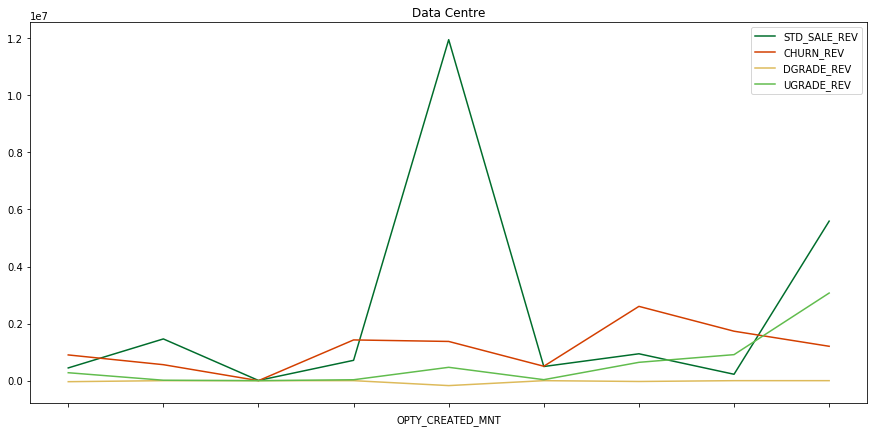

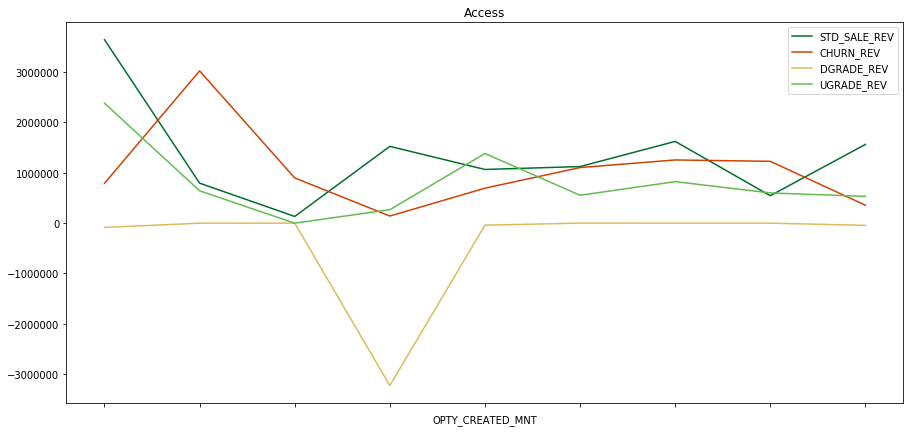

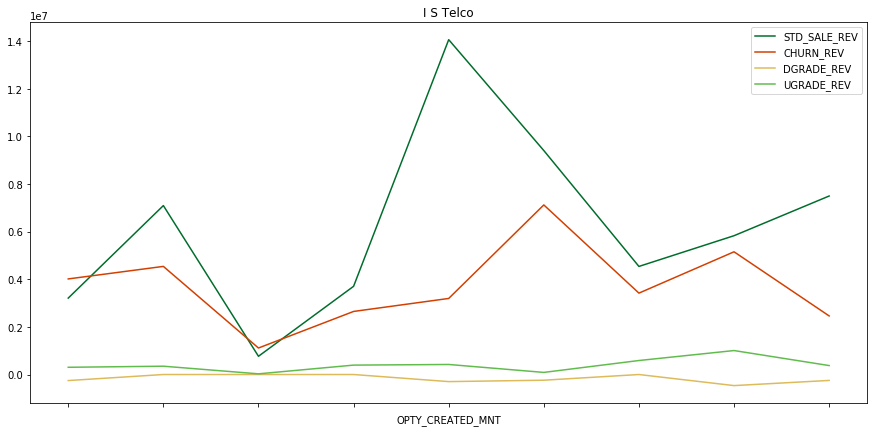

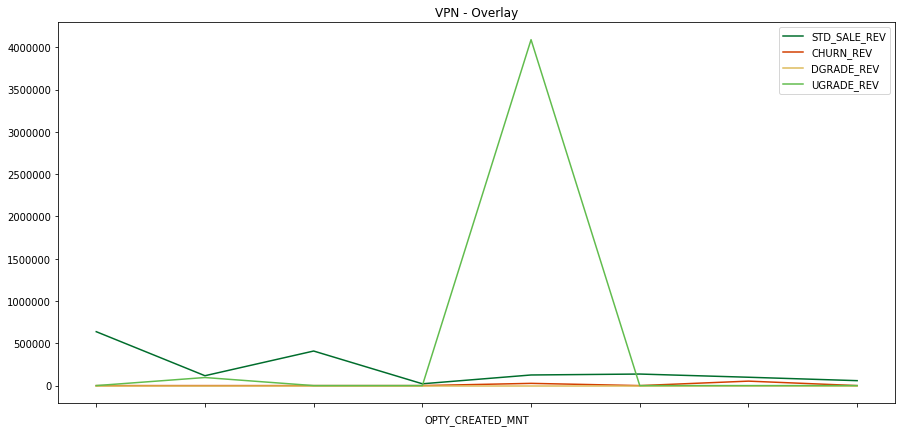

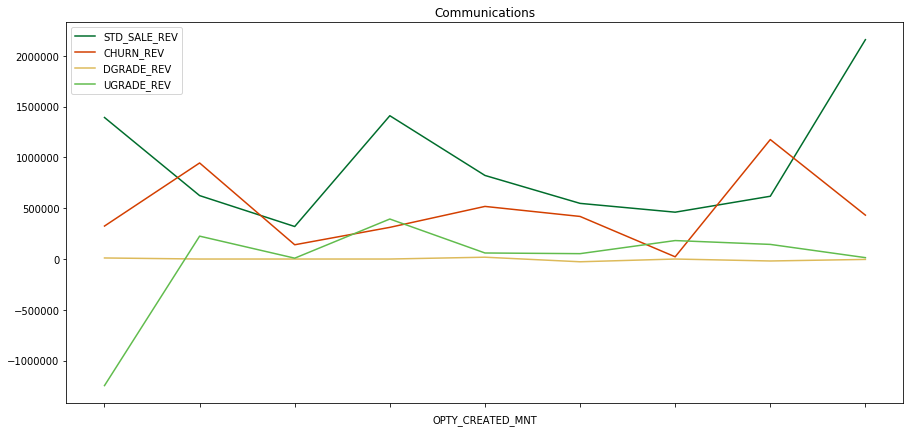

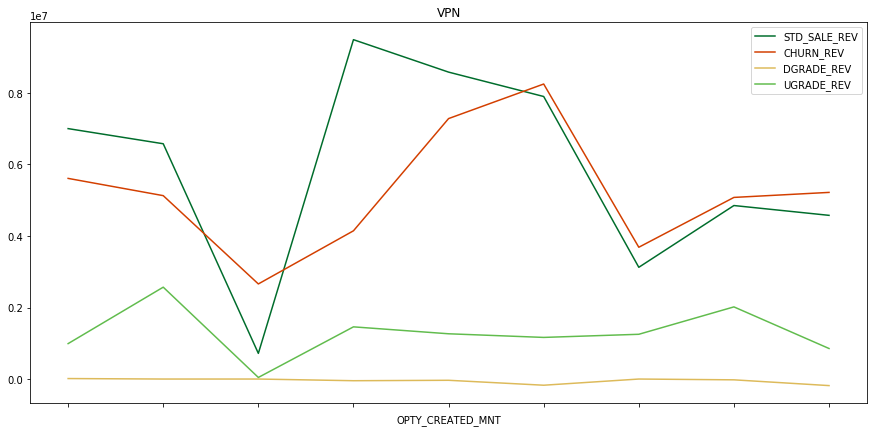

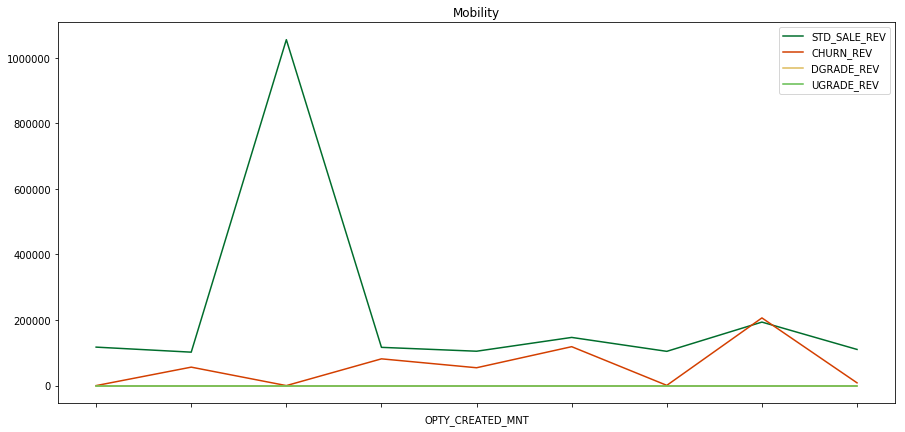

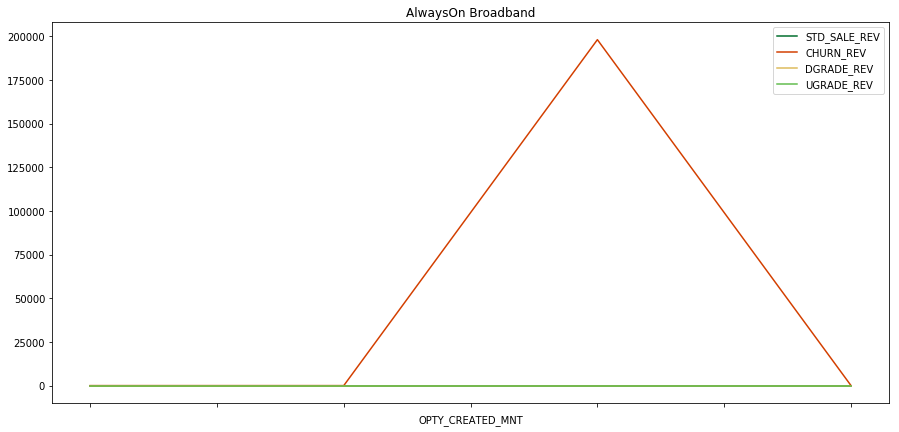

In [14]:
df_rev_ln = df.groupby(['REV_PRODUCT_LN']).sum()
df_rev_ln = df_rev_ln.sort_values('REV_PRICE', ascending=False)
pl = df_rev_ln['REV_PRICE'].reset_index()

for PROD_LN in pl.REV_PRODUCT_LN[:10]:
    df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                     ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

    df_prod_ln_VPN = df_prod_ln[(df_prod_ln['REV_PRODUCT_LN']==PROD_LN) & (df_prod_ln['PROBABILITY']>90)]
    df_prod_ln_VPN = df_prod_ln_VPN.groupby(['OPTY_CREATED_MNT'])\
                     .apply(lambda x: pd.Series(dict(
                         STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                         CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                         DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                         UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                     )))
    df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
    df_prod_ln_VPN['CHURN_REV'] = df_prod_ln_VPN['CHURN_REV'].abs()
    df_prod_ln_VPN.set_index('OPTY_CREATED_MNT',inplace=True)
    fig, ax = plt.subplots(figsize=(30,15))
    colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
    df_prod_ln_VPN.plot(ax=ax, kind='line', figsize=(15,7), fontsize=10, color=colors)
    plt.title(PROD_LN)

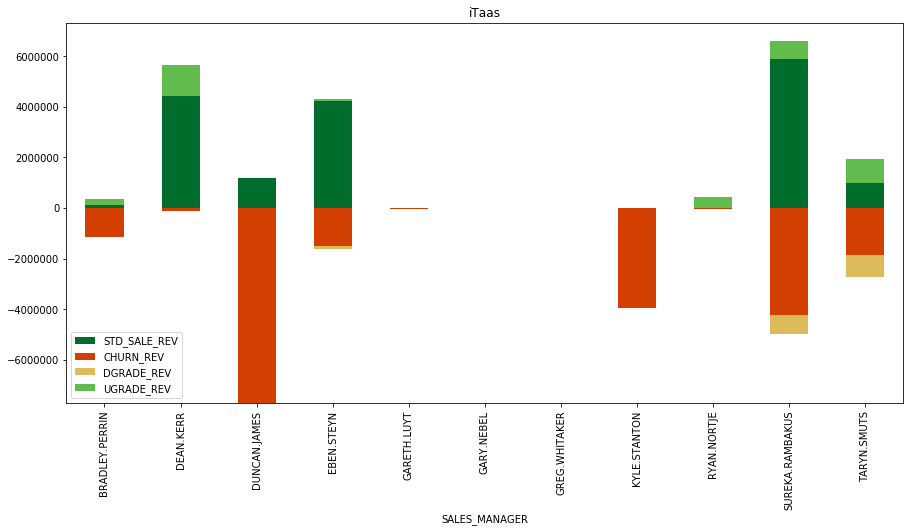

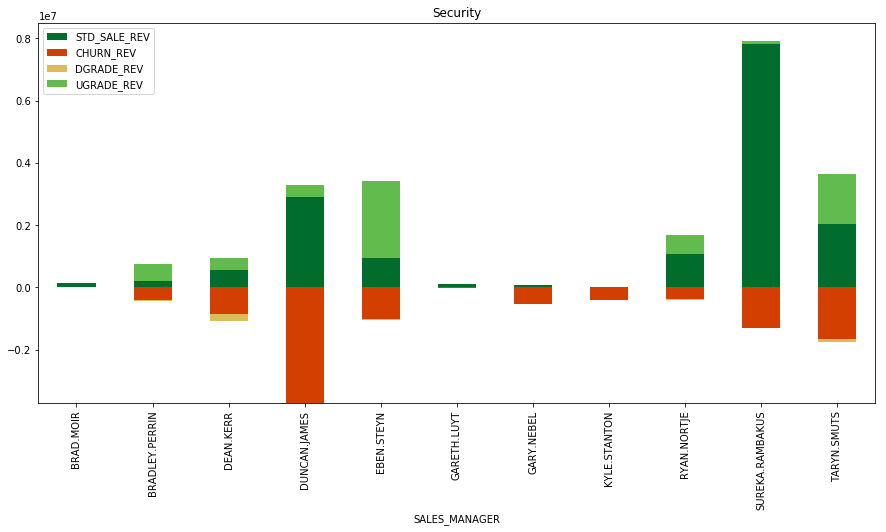

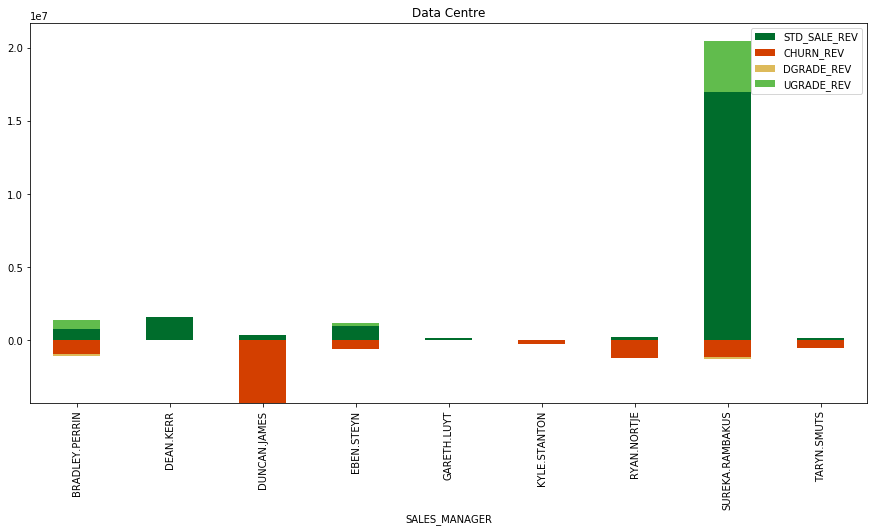

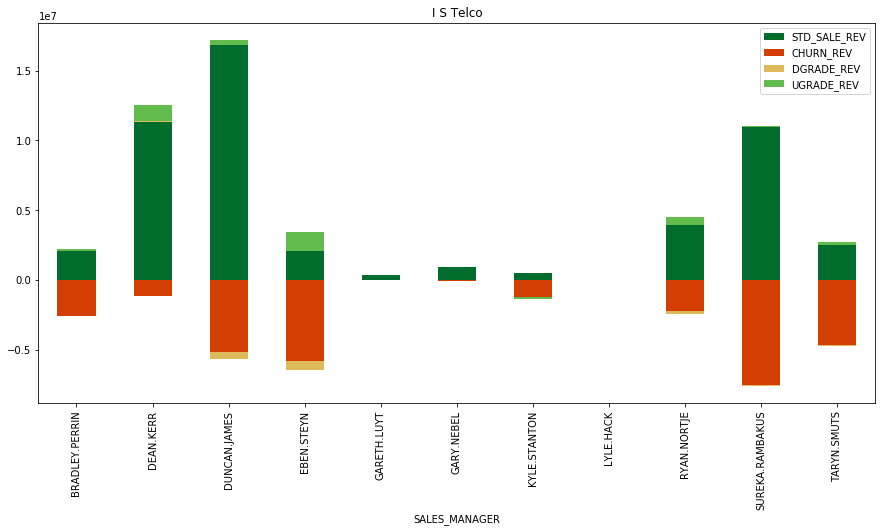

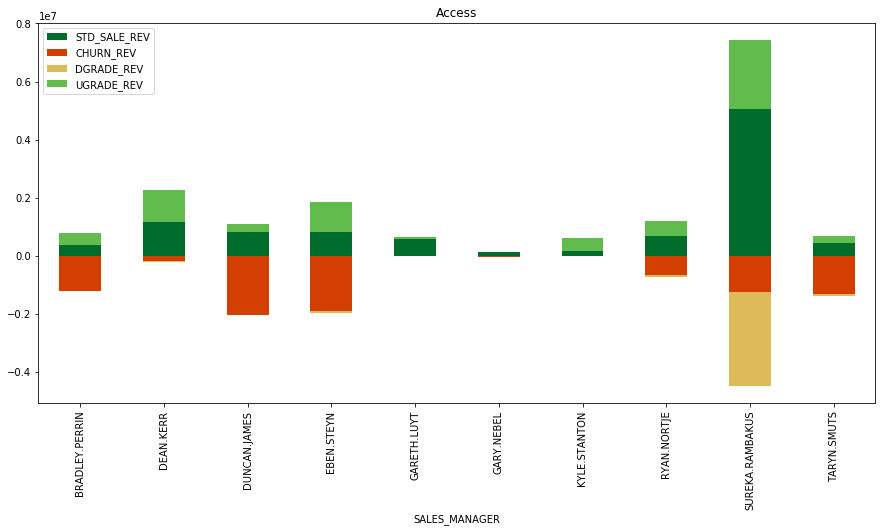

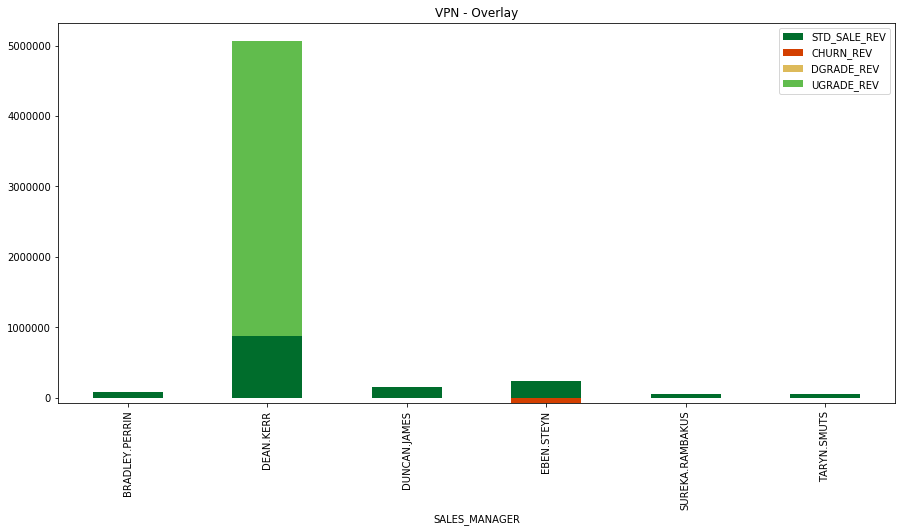

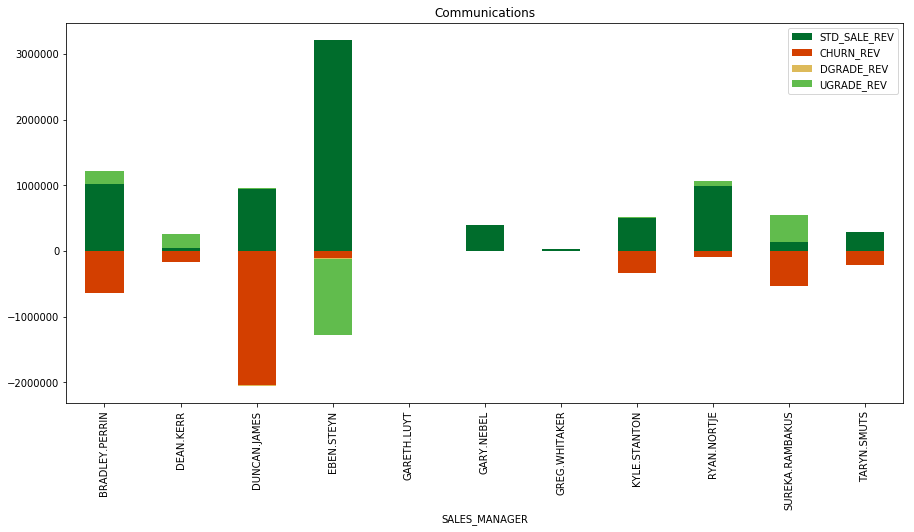

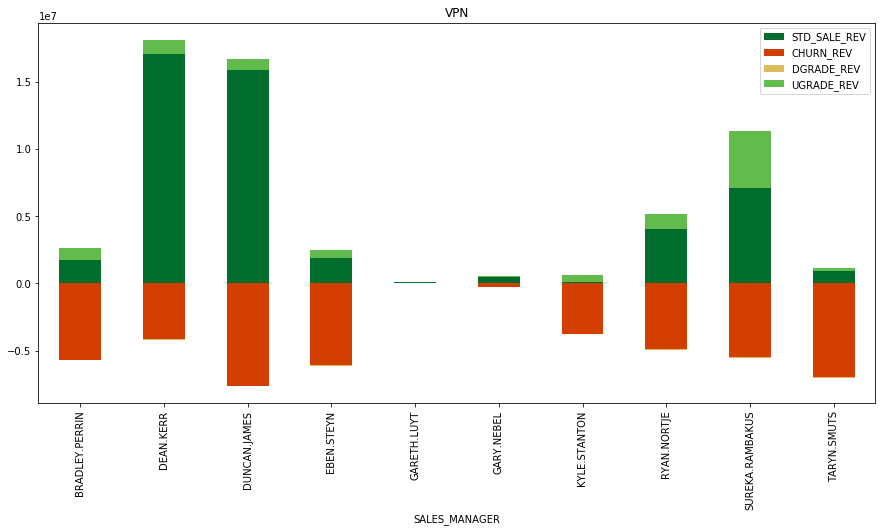

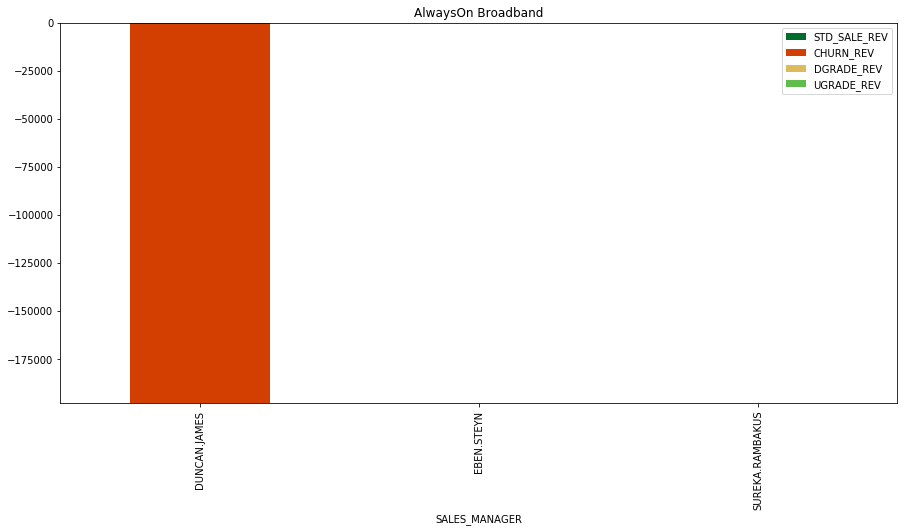

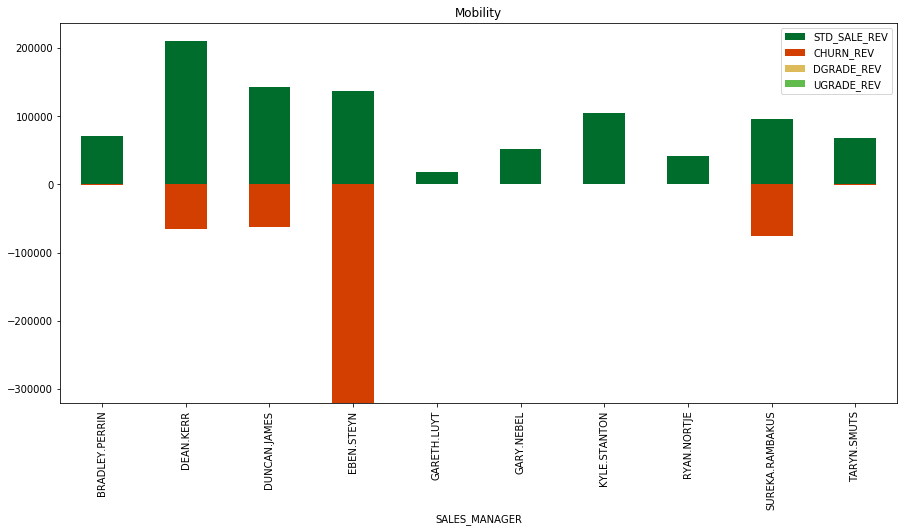

In [19]:
df_rev_ln = df.groupby(['REV_PRODUCT_LN']).sum()
df_rev_ln = df_rev_ln.sort_values('REV_PRICE', ascending=False)
pl = df_rev_ln['REV_PRICE'].reset_index()

for PROD_LN in pl.REV_PRODUCT_LN[:10]:
    df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                     ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

    df_prod_ln_VPN = df_prod_ln[(df_prod_ln['REV_PRODUCT_LN']==PROD_LN) & (df_prod_ln['PROBABILITY']>90)]
    df_prod_ln_VPN = df_prod_ln_VPN.groupby(['SALES_MANAGER'])\
                     .apply(lambda x: pd.Series(dict(
                         STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                         CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                         DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                         UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                     )))
    df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
    df_prod_ln_VPN.set_index('SALES_MANAGER',inplace=True)
    fig, ax = plt.subplots(figsize=(30,15))
    colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
    df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
    plt.title(PROD_LN)

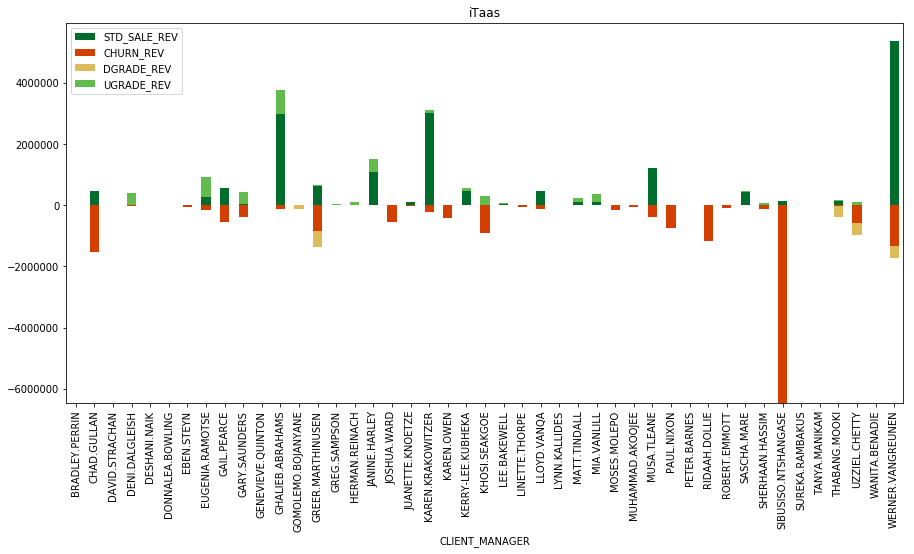

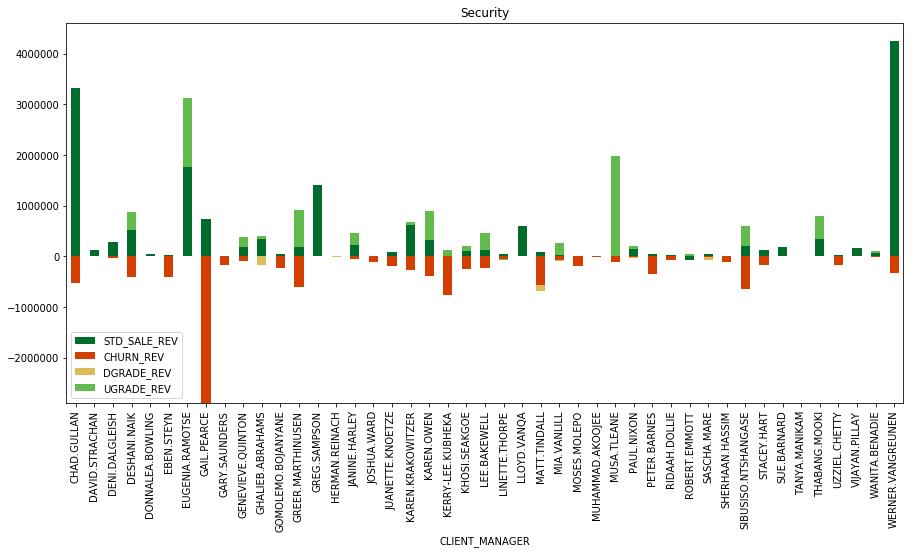

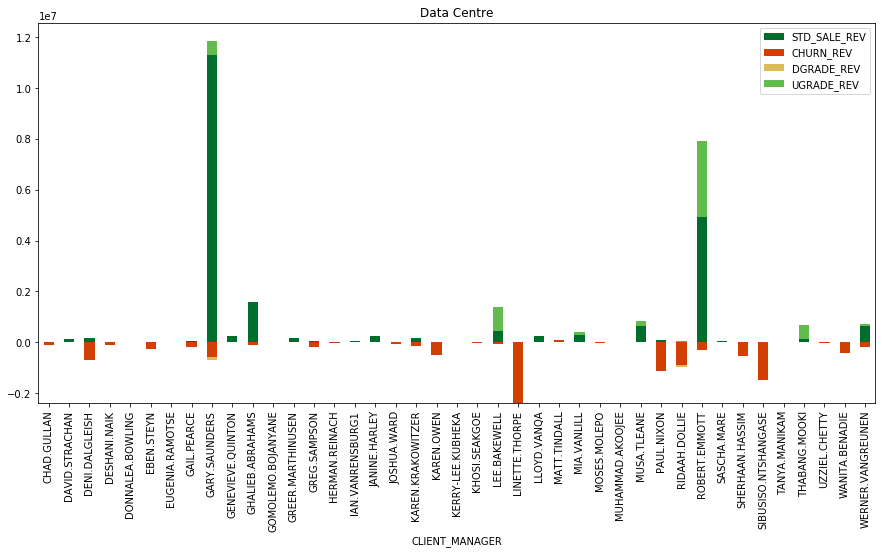

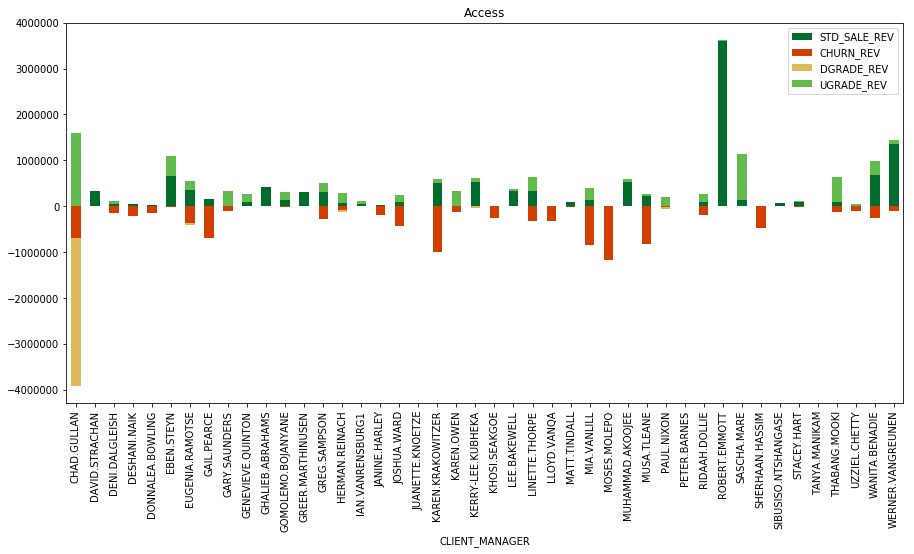

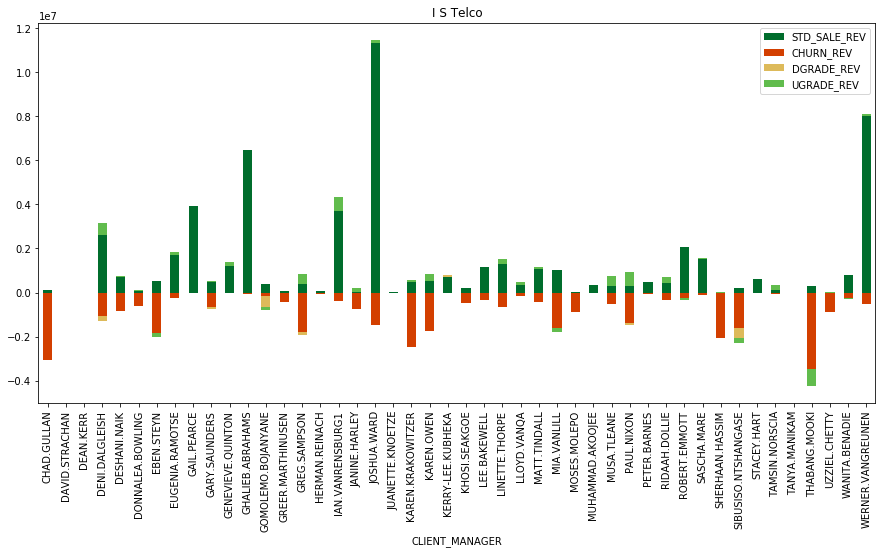

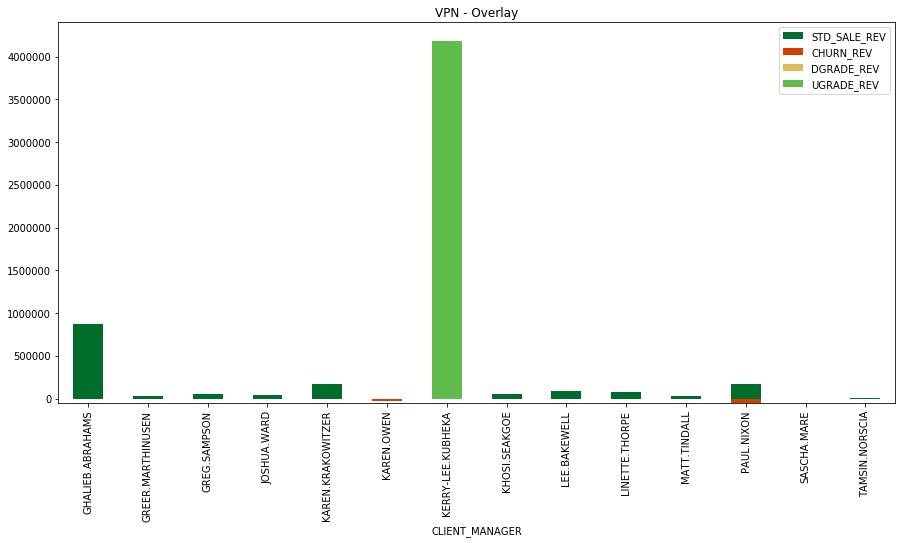

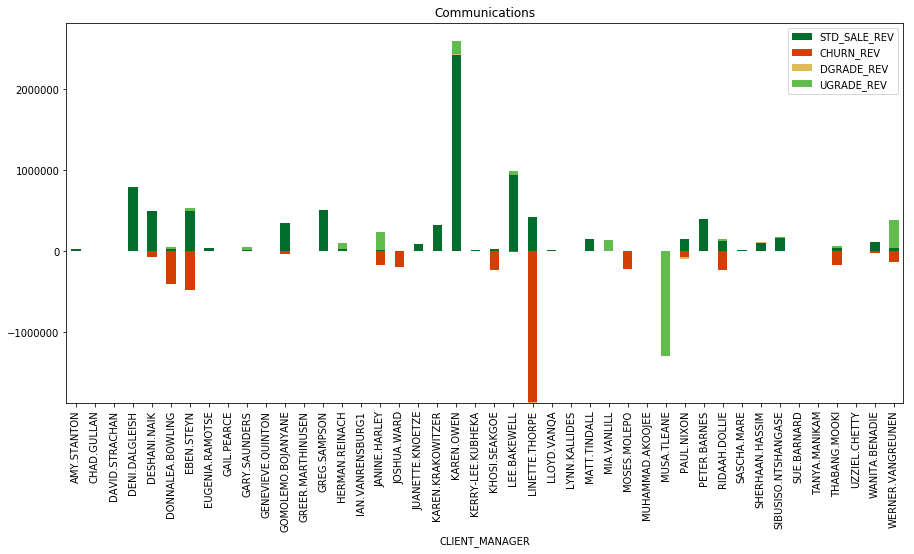

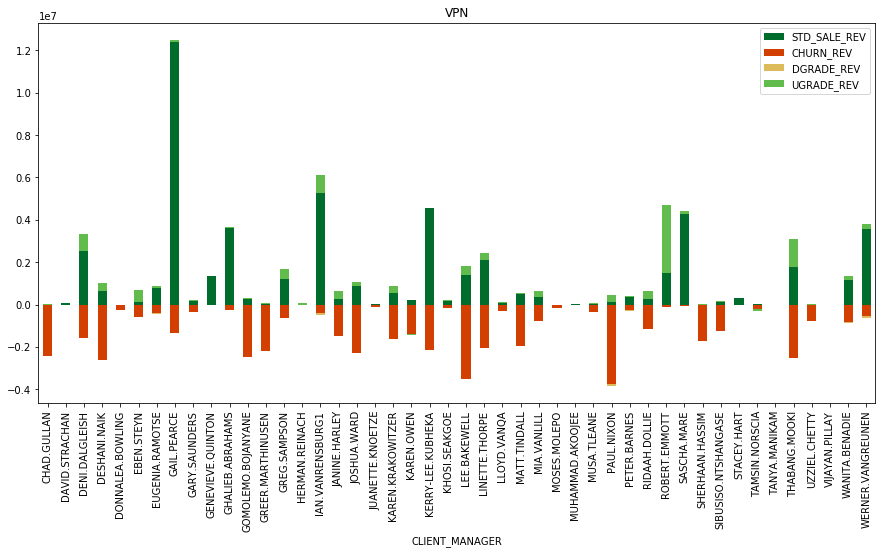

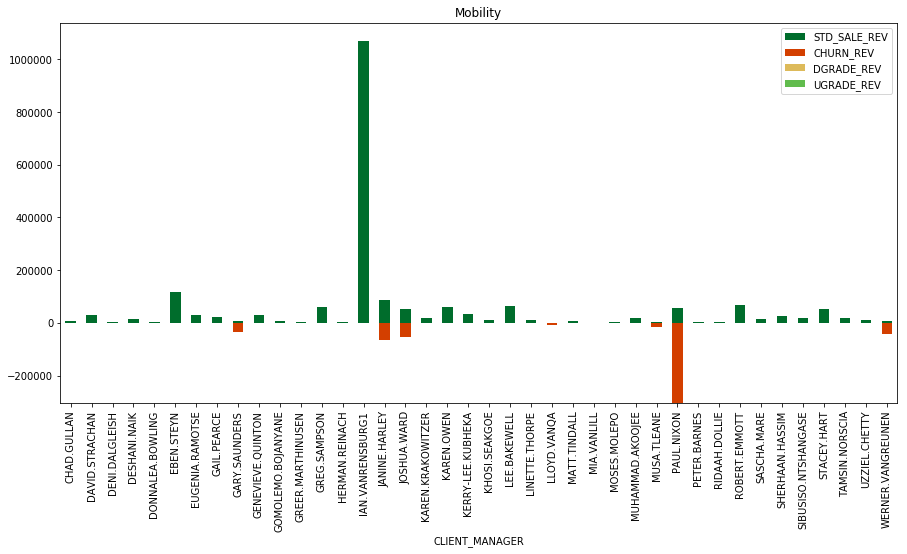

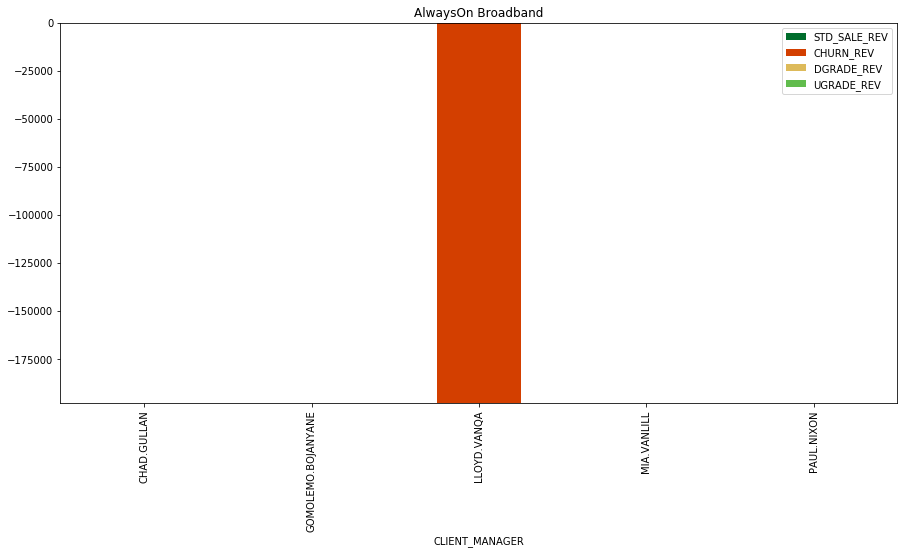

In [15]:
df_rev_ln = df.groupby(['REV_PRODUCT_LN']).sum()
df_rev_ln = df_rev_ln.sort_values('REV_PRICE', ascending=False)
pl = df_rev_ln['REV_PRICE'].reset_index()

for PROD_LN in pl.REV_PRODUCT_LN[:10]:
    df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                     ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

    df_prod_ln_VPN = df_prod_ln[(df_prod_ln['REV_PRODUCT_LN']==PROD_LN) & (df_prod_ln['PROBABILITY']>90)]
    df_prod_ln_VPN = df_prod_ln_VPN.groupby(['CLIENT_MANAGER'])\
                     .apply(lambda x: pd.Series(dict(
                         STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                         CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                         DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                         UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                     )))
    df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
    df_prod_ln_VPN.set_index('CLIENT_MANAGER',inplace=True)
    fig, ax = plt.subplots(figsize=(30,15))
    colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
    df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
    plt.title(PROD_LN)

Text(0.5, 1.0, 'ALL BUs')

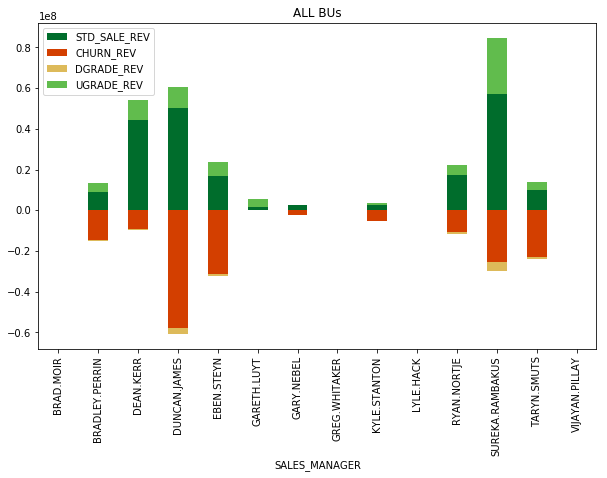

In [16]:
df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                 ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

df_prod_ln_VPN = df_prod_ln[(df_prod_ln['PROBABILITY']>90)]
df_prod_ln_VPN = df_prod_ln_VPN.groupby(['SALES_MANAGER'])\
                 .apply(lambda x: pd.Series(dict(
                     STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                     CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                     DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                     UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                 )))
df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
df_prod_ln_VPN.set_index('SALES_MANAGER',inplace=True)
fig, ax = plt.subplots(figsize=(30,15))
colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(10,6), fontsize=10, stacked=True, color=colors)
plt.title('ALL BUs')

Text(0.5, 1.0, 'ALL BUs')

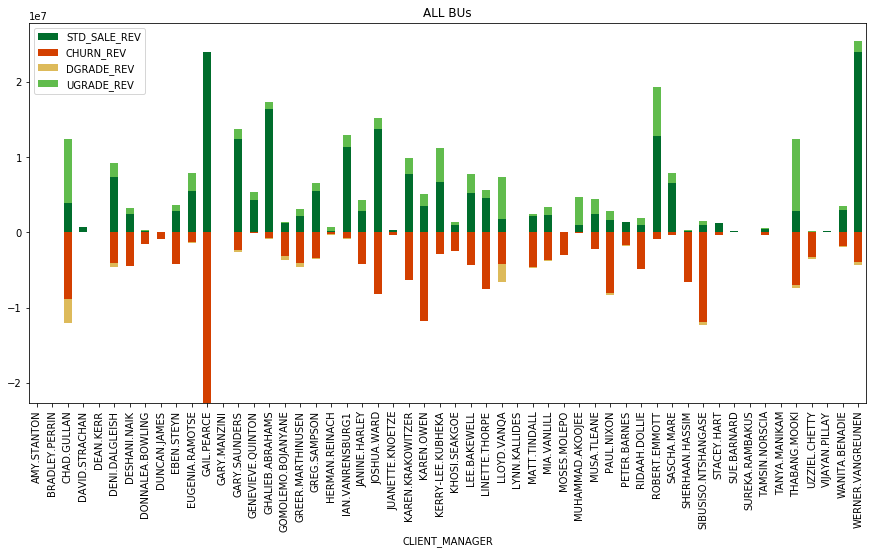

In [17]:
df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                 ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

df_prod_ln_VPN = df_prod_ln[(df_prod_ln['PROBABILITY']>90)]
df_prod_ln_VPN = df_prod_ln_VPN.groupby(['CLIENT_MANAGER'])\
                 .apply(lambda x: pd.Series(dict(
                     STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                     CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                     DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                     UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                 )))
df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
df_prod_ln_VPN.set_index('CLIENT_MANAGER',inplace=True)
fig, ax = plt.subplots(figsize=(30,15))
colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
plt.title('ALL BUs')

Text(0.5, 1.0, 'ALL BUs')

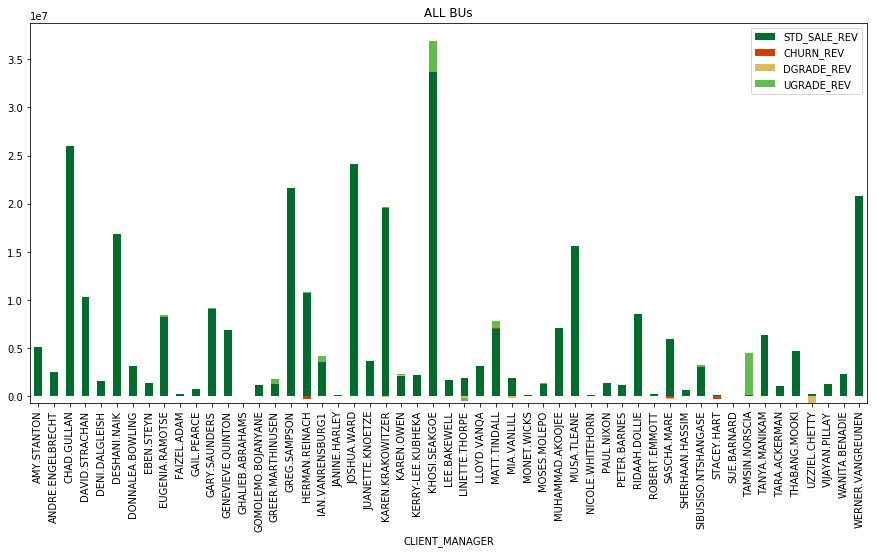

In [18]:
df_prod_ln = df[['SALES_MANAGER','CLIENT_MANAGER','OPTY_CREATED_MNT'\
                 ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

df_prod_ln_VPN = df_prod_ln[(df_prod_ln['PROBABILITY']<90) & (df_prod_ln['PROBABILITY']>10)]
df_prod_ln_VPN = df_prod_ln_VPN.groupby(['CLIENT_MANAGER'])\
                 .apply(lambda x: pd.Series(dict(
                     STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                     CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                     DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                     UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                 )))
df_prod_ln_VPN=df_prod_ln_VPN.reset_index()
df_prod_ln_VPN.set_index('CLIENT_MANAGER',inplace=True)
fig, ax = plt.subplots(figsize=(30,15))
colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
df_prod_ln_VPN.plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
plt.title('ALL BUs')

In [19]:
df_acc = df[['MASTER_ID','OPTY_CREATED_MNT'\
                 ,'OPTY_TYPE','PROBABILITY','REV_PRICE','REV_PRODUCT_LN']]

df_acc = df_acc[(df_acc['PROBABILITY']>=90)]

df_acc_agg = df_acc.groupby(['MASTER_ID'])\
                 .apply(lambda x: pd.Series(dict(
                     STD_SALE_REV = (x[x.OPTY_TYPE=='Standard Sale']['REV_PRICE']).sum(),
                     CHURN_REV    = (x[x.OPTY_TYPE=='Churn']['REV_PRICE']).sum(),
                     DGRADE_REV   = (x[x.OPTY_TYPE=='Downgrade']['REV_PRICE']).sum(),
                     UGRADE_REV   = (x[x.OPTY_TYPE=='Upgrade']['REV_PRICE']).sum()
                 )))
df_acc_agg=df_acc_agg.reset_index()

df_acc_agg.set_index('MASTER_ID',inplace=True)
df_acc_agg.index = df_acc_agg.index.map(str)

Text(0.5, 1.0, 'Account Top Churn Report')

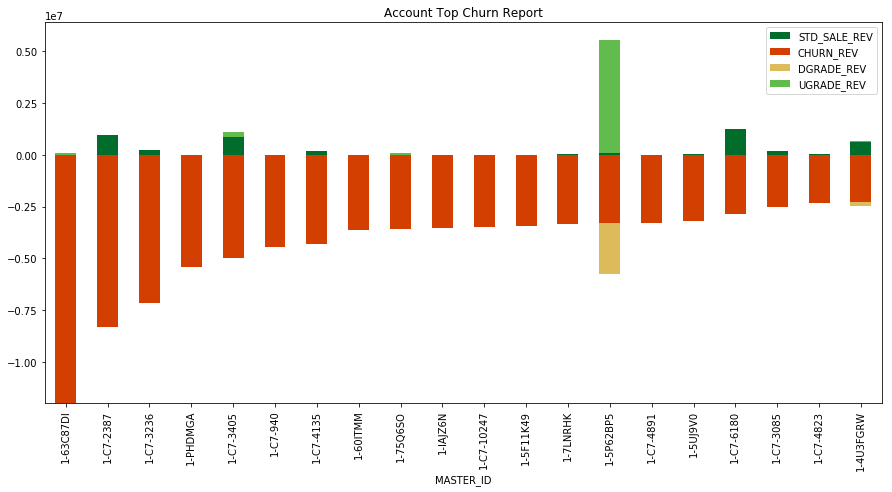

In [23]:
df_acc_agg.sort_values('CHURN_REV', inplace=True, ascending=True)
fig, ax = plt.subplots(figsize=(30,15))
colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
df_acc_agg[:20].plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
plt.title('Account Top Churn Report')

## Top 10 Accounts based on 

Text(0.5, 1.0, 'Account Top Standard Sale Report')

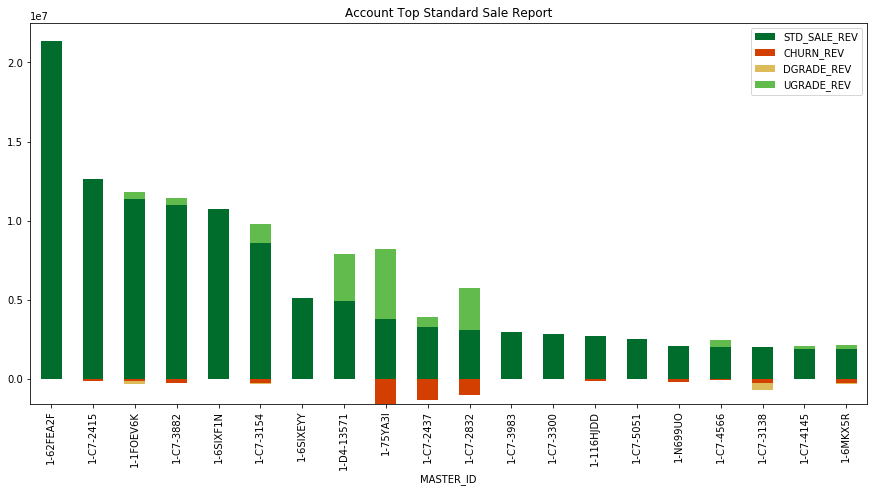

In [24]:
df_acc_agg.sort_values('STD_SALE_REV', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(30,15))
colors = ["#006D2C", "#d33f00","#ddba5a","#61bc4d"]
df_acc_agg[:20].plot(ax=ax, kind='bar', figsize=(15,7), fontsize=10, stacked=True, color=colors)
plt.title('Account Top Standard Sale Report')